# **Data Analytics - Relevel**

Jay Gohil

---

# **Installing and importing necessary libraries**

---

In [ ]:
#Impoting necessary packages and libraries
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# **Acquring the data from URL**

---

In [ ]:
#Taking the data
data = 'https://raw.githubusercontent.com/github-goog/colab/main/Relevel.csv'

dataset = pd.read_csv(data)

dataset

,Order ID,Customer Name,Product,Region,"Sales ('000, USD)",Registered At,Purchased At,Refunded,Origin
0,1,Jones,A,South,500,12/01/18 02:00,12/06/18 18:59,False,referral
1,2,Kivell,B,East,400,12/01/18 12:23,12/06/18 19:54,False,display
2,3,James,G,North,100,12/01/18 13:49,13/06/18 16:37,False,social
3,4,Jack,F,West,200,12/01/18 16:07,14/06/18 14:30,False,social
4,5,Anny,B,Central,250,12/01/18 18:25,14/06/18 15:43,True,other
...,...,...,...,...,...,...,...,...,...
145,146,Thompson,C,South,300,22/02/18 21:25,01/11/18 15:36,False,social
146,147,Mathew,C,Central,110,23/02/18 11:40,06/11/18 19:41,False,organic_search
147,148,Gill,F,East,335,23/02/18 12:03,09/11/18 20:06,False,paid_search
148,149,Amy,A,South,235,23/02/18 13:54,12/11/18 19:17,False,social


# **Engineering the data**

---

In [ ]:
dataset.drop(dataset.columns[[0, 1]], 1, inplace=True)
dataset.rename(columns={"Sales ('000, USD)" : "Sales"}, inplace=True)

#Printing the dataset
dataset

,Product,Region,Sales,Registered At,Purchased At,Refunded,Origin
0,A,South,500,12/01/18 02:00,12/06/18 18:59,False,referral
1,B,East,400,12/01/18 12:23,12/06/18 19:54,False,display
2,G,North,100,12/01/18 13:49,13/06/18 16:37,False,social
3,F,West,200,12/01/18 16:07,14/06/18 14:30,False,social
4,B,Central,250,12/01/18 18:25,14/06/18 15:43,True,other
...,...,...,...,...,...,...,...
145,C,South,300,22/02/18 21:25,01/11/18 15:36,False,social
146,C,Central,110,23/02/18 11:40,06/11/18 19:41,False,organic_search
147,F,East,335,23/02/18 12:03,09/11/18 20:06,False,paid_search
148,A,South,235,23/02/18 13:54,12/11/18 19:17,False,social


In [ ]:
format = "%d/%m/%y %H:%M"

time_arr = []

for i in range (len(dataset)):
  initial_date = date = datetime.datetime.strptime(dataset["Registered At"][i], format)
  final_date = datetime.datetime.strptime(dataset["Purchased At"][i], format)
  time_interval = final_date - initial_date

  try:
    if (int(str(time_interval)[10:12]) > 12):
      time = int(str(time_interval)[0:3]) + 1
  except:
    time = int(str(time_interval)[0:3])
  
  time_arr.append(time)

#dataset[['Time']] = 0

for i in range (len(dataset)):
  dataset.loc[i,"Time"] = time_arr[i]

dataset

,Product,Region,Sales,Registered At,Purchased At,Refunded,Origin,Time
0,A,South,500,12/01/18 02:00,12/06/18 18:59,False,referral,152.0
1,B,East,400,12/01/18 12:23,12/06/18 19:54,False,display,151.0
2,G,North,100,12/01/18 13:49,13/06/18 16:37,False,social,152.0
3,F,West,200,12/01/18 16:07,14/06/18 14:30,False,social,153.0
4,B,Central,250,12/01/18 18:25,14/06/18 15:43,True,other,153.0
...,...,...,...,...,...,...,...,...
145,C,South,300,22/02/18 21:25,01/11/18 15:36,False,social,252.0
146,C,Central,110,23/02/18 11:40,06/11/18 19:41,False,organic_search,256.0
147,F,East,335,23/02/18 12:03,09/11/18 20:06,False,paid_search,259.0
148,A,South,235,23/02/18 13:54,12/11/18 19:17,False,social,262.0


In [ ]:
dataset.drop(dataset.columns[[3, 4]], 1, inplace=True)

dataset

,Product,Region,Sales,Refunded,Origin,Time
0,A,South,500,False,referral,152.0
1,B,East,400,False,display,151.0
2,G,North,100,False,social,152.0
3,F,West,200,False,social,153.0
4,B,Central,250,True,other,153.0
...,...,...,...,...,...,...
145,C,South,300,False,social,252.0
146,C,Central,110,False,organic_search,256.0
147,F,East,335,False,paid_search,259.0
148,A,South,235,False,social,262.0


# **Gainining Insights**

---

In [ ]:
A_Sales = 0
A_count = 0
B_Sales = 0
B_count = 0
C_Sales = 0
C_count = 0
D_Sales = 0
D_count = 0
E_Sales = 0
E_count = 0
F_Sales = 0
F_count = 0
G_Sales = 0
G_count = 0

for i in range(len(dataset)):
  if dataset["Product"][i] == "A":
    A_Sales += int(dataset["Sales"][i])
    A_count += 1

  elif dataset["Product"][i] == "B":
    B_Sales += int(dataset["Sales"][i])
    B_count += 1

  elif dataset["Product"][i] == "C":
    C_Sales += int(dataset["Sales"][i])
    C_count += 1

  elif dataset["Product"][i] == "D":
    D_Sales += int(dataset["Sales"][i])
    D_count += 1

  elif dataset["Product"][i] == "E":
    E_Sales += int(dataset["Sales"][i])
    E_count += 1

  elif dataset["Product"][i] == "F":
    F_Sales += int(dataset["Sales"][i])
    F_count += 1

  elif dataset["Product"][i] == "G":
    G_Sales += int(dataset["Sales"][i])
    G_count += 1

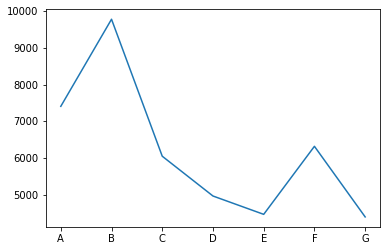

In [ ]:
x1 = ["A", "B", "C", "D", "E", "F", "G"]
Sales_value = [A_Sales, B_Sales, C_Sales, D_Sales, E_Sales, F_Sales, G_Sales]

plt.plot(x1, Sales_value)

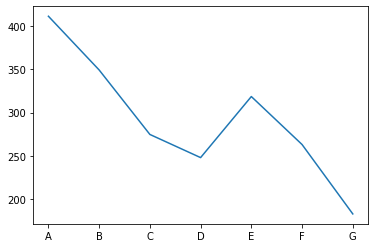

In [ ]:
x2 = ["A", "B", "C", "D", "E", "F", "G"]
Sales_value_per_transaction = [A_Sales/A_count, B_Sales/B_count, C_Sales/C_count, D_Sales/D_count, E_Sales/E_count, F_Sales/F_count, G_Sales/G_count]

plt.plot(x2, Sales_value_per_transaction)

In [ ]:
referral_Sales = 0
referral_count = 0
display_Sales = 0
display_count = 0
social_Sales = 0
social_count = 0
organic_search_Sales = 0
organic_search_count = 0
paid_search_Sales = 0
paid_search_count = 0
direct_traffic_Sales = 0
direct_traffic_count = 0
email_Sales = 0
email_count = 0
unknown_Sales = 0
unknown_count = 0
other_Sales = 0
other_count = 0

for i in range(len(dataset)):
  if dataset["Origin"][i] == "referral":
    referral_Sales += int(dataset["Sales"][i])
    referral_count += 1

  elif dataset["Origin"][i] == "display":
    display_Sales += int(dataset["Sales"][i])
    display_count += 1

  elif dataset["Origin"][i] == "social":
    social_Sales += int(dataset["Sales"][i])
    social_count += 1

  elif dataset["Origin"][i] == "organic_search":
    organic_search_Sales += int(dataset["Sales"][i])
    organic_search_count += 1

  elif dataset["Origin"][i] == "paid_search":
    paid_search_Sales += int(dataset["Sales"][i])
    paid_search_count += 1

  elif dataset["Origin"][i] == "direct_traffic":
    direct_traffic_Sales += int(dataset["Sales"][i])
    direct_traffic_count += 1

  elif dataset["Origin"][i] == "email":
    email_Sales += int(dataset["Sales"][i])
    email_count += 1

  elif dataset["Origin"][i] == "unknown":
    unknown_Sales += int(dataset["Sales"][i])
    unknown_count += 1

  elif dataset["Origin"][i] == "other":
    other_Sales += int(dataset["Sales"][i])
    other_count += 1

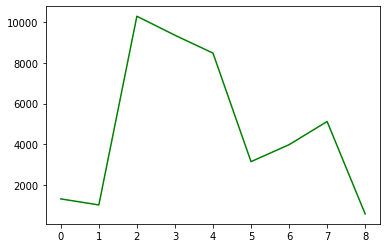

In [ ]:
#X = ["referral_Sales", "display_Sales", "social_Sales", "organic_search_Sales", "paid_search_Sales", "direct_traffic_Sales", "email_Sales", "unknown_Sales", "other_Sales"]
X3 = [0,1,2,3,4,5,6,7,8]
Origin_Values = [referral_Sales, display_Sales, social_Sales, organic_search_Sales, paid_search_Sales, direct_traffic_Sales, email_Sales, unknown_Sales, other_Sales]

plt.plot(X3, Origin_Values, color="green")

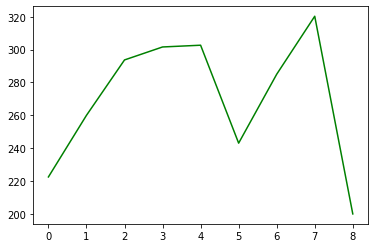

In [ ]:
#X = ["referral_Sales", "display_Sales", "social_Sales", "organic_search_Sales", "paid_search_Sales", "direct_traffic_Sales", "email_Sales", "unknown_Sales", "other_Sales"]
X4 = [0,1,2,3,4,5,6,7,8]
Origin_Values_per_transaction = [referral_Sales/referral_count, display_Sales/display_count, social_Sales/social_count, organic_search_Sales/organic_search_count, paid_search_Sales/paid_search_count, direct_traffic_Sales/direct_traffic_count, email_Sales/email_count, unknown_Sales/unknown_count, other_Sales/other_count]

plt.plot(X4, Origin_Values_per_transaction, color="green")

In [ ]:
East_Sales = 0
East_count = 0
West_Sales = 0
West_count = 0
South_Sales = 0
South_count = 0
North_Sales = 0
North_count = 0
Central_Sales = 0
Central_count = 0

for i in range(len(dataset)):
  if dataset["Region"][i] == "East":
    East_Sales += int(dataset["Sales"][i])
    East_count += 1

  elif dataset["Region"][i] == "West":
    West_Sales += int(dataset["Sales"][i])
    West_count += 1

  elif dataset["Region"][i] == "South":
    South_Sales += int(dataset["Sales"][i])
    South_count += 1

  elif dataset["Region"][i] == "North":
    North_Sales += int(dataset["Sales"][i])
    North_count += 1

  elif dataset["Region"][i] == "Central":
    Central_Sales += int(dataset["Sales"][i])
    Central_count += 1

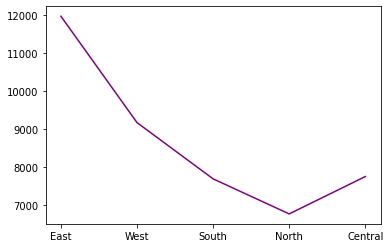

In [ ]:
X5 = ["East", "West", "South", "North", "Central"]
Region_Values = [East_Sales, West_Sales, South_Sales, North_Sales, Central_Sales]

plt.plot(X5, Region_Values, color="purple")

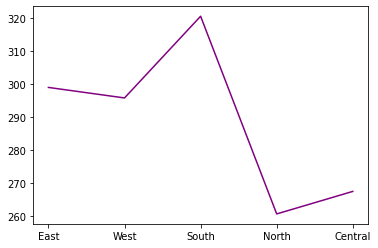

In [ ]:
X6 = ["East", "West", "South", "North", "Central"]
Region_Values_per_transaction = [East_Sales/East_count, West_Sales/West_count, South_Sales/South_count, North_Sales/North_count, Central_Sales/Central_count]

plt.plot(X6, Region_Values_per_transaction, color="purple")

In [ ]:
A_refunded_count = 0
B_refunded_count = 0
C_refunded_count = 0
D_refunded_count = 0
E_refunded_count = 0
F_refunded_count = 0
G_refunded_count = 0

for i in range(len(dataset)):
  if dataset["Product"][i] == "A":
    if dataset["Refunded"][i] == True:
      A_refunded_count += 1

  if dataset["Product"][i] == "B":
    if dataset["Refunded"][i] == True:
      B_refunded_count += 1
  
  if dataset["Product"][i] == "C":
    if dataset["Refunded"][i] == True:
      C_refunded_count += 1
  
  if dataset["Product"][i] == "D":
    if dataset["Refunded"][i] == True:
      D_refunded_count += 1

  if dataset["Product"][i] == "E":
    if dataset["Refunded"][i] == True:
      E_refunded_count += 1

  if dataset["Product"][i] == "E":
    if dataset["Refunded"][i] == True:
      F_refunded_count += 1

  if dataset["Product"][i] == "F":
    if dataset["Refunded"][i] == True:
      G_refunded_count += 1

  if dataset["Product"][i] == "G":
    if dataset["Refunded"][i] == True:
      H_refunded_count += 1

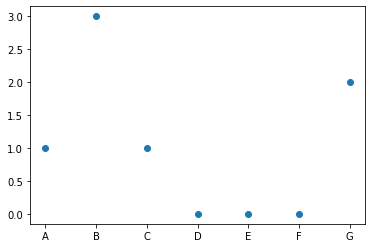

In [ ]:
x7 = ["A", "B", "C", "D", "E", "F", "G"]
Refunded_value = [A_refunded_count, B_refunded_count, C_refunded_count, D_refunded_count, E_refunded_count, F_refunded_count, G_refunded_count]

plt.scatter(x7, Refunded_value)

In [ ]:
referral_refunded_count = 0
display_refunded_count = 0
social_refunded_count = 0
organic_search_refunded_count = 0
paid_search_refunded_count = 0
direct_traffic_refunded_count = 0
email_refunded_count = 0
unknown_refunded_count = 0
other_refunded_count = 0


for i in range(len(dataset)):
  if dataset["Origin"][i] == "referral":
    if dataset["Refunded"][i] == True:
      referral_refunded_count += 1

  if dataset["Origin"][i] == "display":
    if dataset["Refunded"][i] == True:
      display_refunded_count += 1
  
  if dataset["Origin"][i] == "social":
    if dataset["Refunded"][i] == True:
      social_refunded_count += 1
  
  if dataset["Origin"][i] == "organic_search":
    if dataset["Refunded"][i] == True:
      organic_search_refunded_count += 1

  if dataset["Origin"][i] == "paid_search":
    if dataset["Refunded"][i] == True:
      paid_search_refunded_count += 1

  if dataset["Origin"][i] == "direct_traffic":
    if dataset["Refunded"][i] == True:
      direct_traffic_refunded_count += 1

  if dataset["Origin"][i] == "email":
    if dataset["Refunded"][i] == True:
      email_refunded_count += 1

  if dataset["Origin"][i] == "unknown":
    if dataset["Refunded"][i] == True:
      unknown_refunded_count += 1

  if dataset["Origin"][i] == "other":
    if dataset["Refunded"][i] == True:
      other_refunded_count += 1

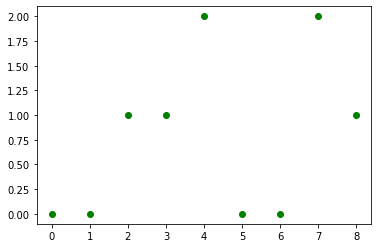

In [ ]:
Refund_value_origin = [referral_refunded_count, display_refunded_count, social_refunded_count, organic_search_refunded_count, paid_search_refunded_count, direct_traffic_refunded_count, email_refunded_count, unknown_refunded_count, other_refunded_count]
X8 = [0,1,2,3,4,5,6,7,8]

plt.scatter(X8, Refund_value_origin, color="green")

In [ ]:
East_refunded_count = 0
West_refunded_count = 0
South_refunded_count = 0
North_refunded_count = 0
Central_refunded_count = 0

for i in range(len(dataset)):
  if dataset["Region"][i] == "East":
    if dataset["Refunded"][i] == True:
      East_refunded_count += 1

  if dataset["Region"][i] == "West":
    if dataset["Refunded"][i] == True:
      West_refunded_count += 1
  
  if dataset["Region"][i] == "South":
    if dataset["Refunded"][i] == True:
      South_refunded_count += 1
  
  if dataset["Region"][i] == "North":
    if dataset["Refunded"][i] == True:
      North_refunded_count += 1

  if dataset["Region"][i] == "Central":
    if dataset["Refunded"][i] == True:
      Central_refunded_count += 1

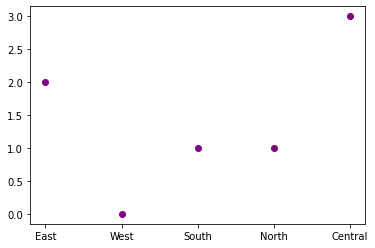

In [ ]:
X9 = ["East", "West", "South", "North", "Central"]
Region_refunded_values = [East_refunded_count, West_refunded_count, South_refunded_count, North_refunded_count, Central_refunded_count]

plt.scatter(X9, Region_refunded_values, color="purple")

In [ ]:
A_Time = 0
B_Time = 0
C_Time = 0
D_Time = 0
E_Time = 0
F_Time = 0
G_Time = 0

for i in range(len(dataset)):
  if dataset["Product"][i] == "A":
    A_Time += int(dataset["Time"][i])

  elif dataset["Product"][i] == "B":
    B_Time += int(dataset["Time"][i])

  elif dataset["Product"][i] == "C":
    C_Time += int(dataset["Time"][i])

  elif dataset["Product"][i] == "D":
    D_Time += int(dataset["Time"][i])

  elif dataset["Product"][i] == "E":
    E_Time += int(dataset["Time"][i])

  elif dataset["Product"][i] == "F":
    F_Time += int(dataset["Time"][i])

  elif dataset["Product"][i] == "G":
    G_Time += int(dataset["Time"][i])

<BarContainer object of 7 artists>

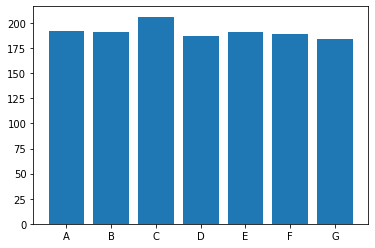

In [ ]:
x10 = ["A", "B", "C", "D", "E", "F", "G"]
Time_value = [A_Time/A_count, B_Time/B_count, C_Time/C_count, D_Time/D_count, E_Time/E_count, F_Time/F_count, G_Time/G_count]

plt.bar(x10, Time_value)

In [ ]:
referral_time = 0
display_time = 0
social_time = 0
organic_search_time = 0
paid_search_time = 0
direct_traffic_time = 0
email_time = 0
unknown_time = 0
other_time = 0

for i in range(len(dataset)):
  if dataset["Origin"][i] == "referral":
    referral_time += int(dataset["Time"][i])

  elif dataset["Origin"][i] == "display":
    display_time += int(dataset["Time"][i])

  elif dataset["Origin"][i] == "social":
    social_time += int(dataset["Time"][i])

  elif dataset["Origin"][i] == "organic_search":
    organic_search_time += int(dataset["Time"][i])

  elif dataset["Origin"][i] == "paid_search":
    paid_search_time += int(dataset["Time"][i])

  elif dataset["Origin"][i] == "direct_traffic":
    direct_traffic_time += int(dataset["Time"][i])

  elif dataset["Origin"][i] == "email":
    email_time += int(dataset["Time"][i])

  elif dataset["Origin"][i] == "unknown":
    unknown_time += int(dataset["Time"][i])

  elif dataset["Origin"][i] == "other":
    other_time += int(dataset["Time"][i])

<BarContainer object of 9 artists>

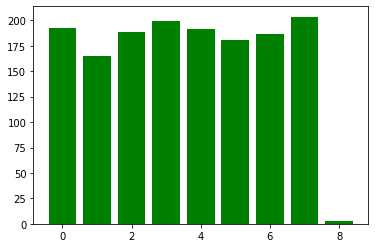

In [ ]:
X11 = [0,1,2,3,4,5,6,7,8]
origin_time = [referral_time/referral_count, display_time/display_count,
               social_time/social_count, organic_search_time/organic_search_count,
               paid_search_time/paid_search_count,
               direct_traffic_time/direct_traffic_count,
               email_time/email_count, unknown_time/unknown_count, other_count]
plt.bar(X11, origin_time, color="green")

In [ ]:
East_time = 0
West_time = 0
South_time = 0
North_time = 0
Central_time = 0

for i in range(len(dataset)):
  if dataset["Region"][i] == "East":
    East_time += int(dataset["Time"][i])
    
  elif dataset["Region"][i] == "West":
    West_time += int(dataset["Time"][i])
    
  elif dataset["Region"][i] == "South":
    South_time += int(dataset["Time"][i])
    
  elif dataset["Region"][i] == "North":
    North_time += int(dataset["Time"][i])

  elif dataset["Region"][i] == "North":
    Central_time += int(dataset["Time"][i])

<BarContainer object of 5 artists>

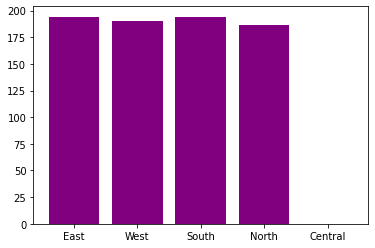

In [ ]:
X12 = ["East", "West", "South", "North", "Central"]
Region_time = [East_time/East_count, West_time/West_count,
               South_time/South_count, North_time/North_count,
               Central_time/Central_count]

plt.bar(X12, Region_time, color="purple")

# **Thank You!**

---